# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [219]:
#print cities for sanity check
#print(cities)

In [7]:
#create a sample response to look at how data is arranged in json
#data_to_keep = ['city_name', 'lat', 'long', 'max_temp', 'cloudiness', 'wind_speed', 'humidity', 'country', 'date']
query_url = f"{url}appid={weather_api_key}&units={units}&q="
sample_req = requests.get(query_url+"kangaatsiaq").json()
print(sample_req)


{'coord': {'lon': -53.4641, 'lat': 68.3065}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 30.6, 'feels_like': 22.41, 'temp_min': 30.6, 'temp_max': 30.6, 'pressure': 1013, 'humidity': 87, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 109, 'gust': 10.33}, 'clouds': {'all': 2}, 'dt': 1619326407, 'sys': {'country': 'GL', 'sunrise': 1619333640, 'sunset': 1619395754}, 'timezone': -7200, 'id': 3422683, 'name': 'Kangaatsiaq', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#million+1 th attempt
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

#loop set up
city_name = []
lat = []
lon = []
max_temp = []
cloudiness = []
wind_speed = []
humidity = []
country = []
date = []

for city in cities:
    try:
        keep_response = requests.get(query_url + city).json()
        city_name.append(keep_response['name'])
        lat.append(keep_response['coord']['lat'])
        lon.append(keep_response['coord']['lon'])
        max_temp.append(keep_response['main']['temp_max'])
        cloudiness.append(keep_response['clouds']['all'])
        wind_speed.append(keep_response['wind']['speed'])
        humidity.append(keep_response['main']['humidity'])
        country.append(keep_response['sys']['country'])
        date.append(keep_response['dt'])
        print(f'processing record for: {city}')
    
    except KeyError:
        print('records missing for {city} skipping...')

print('done')
print(len(city_name))
print(len(lat))
print(len(lon))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country))
print(len(date))

d for: grand gaube
processing record for: zarubino
processing record for: coquimbo
processing record for: kartaly
processing record for: shibata
records missing for {city} skipping...
processing record for: castro
processing record for: vaini
processing record for: albany
processing record for: matara
processing record for: vestmannaeyjar
processing record for: hermanus
processing record for: kholtoson
processing record for: kavaratti
processing record for: puri
processing record for: barrow
processing record for: jamestown
processing record for: hounde
processing record for: araure
processing record for: aykhal
processing record for: hilo
processing record for: neiafu
records missing for {city} skipping...
processing record for: laredo
processing record for: ushuaia
processing record for: san matias
processing record for: hithadhoo
processing record for: kodiak
processing record for: sabang
processing record for: klaksvik
processing record for: constitucion
processing record for: pont

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:

weather_dict = {
    "city": city_name,
    "latitude": lat,
    "longitude": lon,
    "max_temperature": max_temp,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
    "humidity": humidity,
    "country": country,
    "date": date
}
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv('cities.csv')
weather_df.head()


,city,latitude,longitude,max_temperature,cloudiness,wind_speed,humidity,country,date
0,Punta Arenas,-53.1500,-70.9167,42.80,0,3.44,75,CL,1619326413
1,Praia,14.9215,-23.5087,69.80,75,12.66,73,CV,1619326413
2,Rikitea,-23.1203,-134.9692,78.66,100,12.82,76,PF,1619326414
3,Kuytun,54.3419,101.5036,43.41,97,8.70,55,RU,1619326414
4,Yining,29.0361,114.5636,61.52,100,3.71,91,CN,1619326414


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
high_humidity = weather_df['humidity'] >= 101
print(high_humidity.value_counts())

False    584
Name: humidity, dtype: int64


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

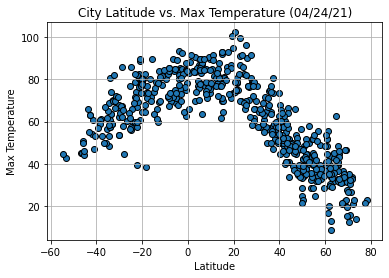

In [12]:
plt.scatter(weather_df['latitude'], weather_df['max_temperature'], edgecolors='black')
plt.title('City Latitude vs. Max Temperature (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

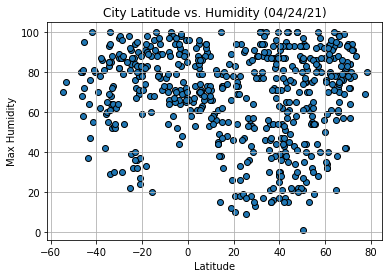

In [13]:
plt.scatter(weather_df['latitude'], weather_df['humidity'], edgecolors='black')
plt.title('City Latitude vs. Humidity (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Humidity')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

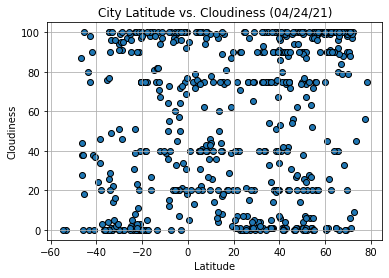

In [14]:
plt.scatter(weather_df['latitude'], weather_df['cloudiness'], edgecolors='black')
plt.title('City Latitude vs. Cloudiness (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

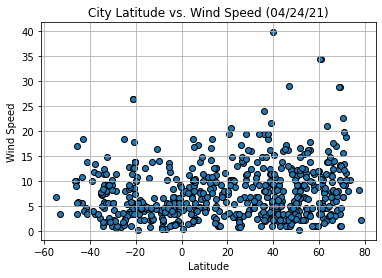

In [15]:
plt.scatter(weather_df['latitude'], weather_df['wind_speed'], edgecolors='black')
plt.title('City Latitude vs. Wind Speed (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.show()

## Linear Regression

In [16]:
#split the data up by latitude- northern hemisphere
northern_hem = weather_df.loc[weather_df['latitude'] > 0, :]
northern_hem.head()

,city,latitude,longitude,max_temperature,cloudiness,wind_speed,humidity,country,date
1,Praia,14.9215,-23.5087,69.80,75,12.66,73,CV,1619326413
3,Kuytun,54.3419,101.5036,43.41,97,8.70,55,RU,1619326414
4,Yining,29.0361,114.5636,61.52,100,3.71,91,CN,1619326414
5,Grand Island,40.9250,-98.3420,52.00,1,6.91,54,US,1619326415
6,Fengzhen,40.4394,113.1536,59.45,96,15.35,39,CN,1619326415


In [17]:
#split the data up by latitude- southern hemisphere
southern_hem = weather_df.loc[weather_df['latitude'] < 0, :]
southern_hem.head()

,city,latitude,longitude,max_temperature,cloudiness,wind_speed,humidity,country,date
0,Punta Arenas,-53.1500,-70.9167,42.80,0,3.44,75,CL,1619326413
2,Rikitea,-23.1203,-134.9692,78.66,100,12.82,76,PF,1619326414
7,Esperance,-33.8667,121.9000,80.60,29,11.50,29,AU,1619326416
8,Mlonggo,-6.5333,110.7000,89.60,20,10.36,58,ID,1619326416
9,Amahai,-3.3333,128.9167,85.62,50,6.87,64,ID,1619326417


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value for Northern Hemisphere: City Latitude vs. Max Temperature is -0.8882850357767166


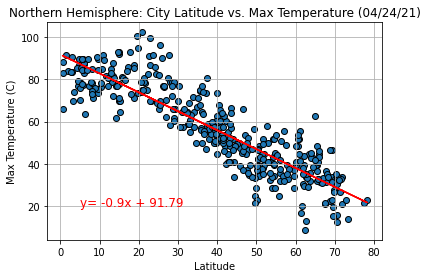

In [19]:

#linear regress
x_values = northern_hem['latitude']
y_values = northern_hem['max_temperature']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(northern_hem['latitude'], northern_hem['max_temperature'])
print(f'The r-value for Northern Hemisphere: City Latitude vs. Max Temperature is {res.rvalue}')

plt.scatter(northern_hem['latitude'], northern_hem['max_temperature'], edgecolors='black')
plt.title('Northern Hemisphere: City Latitude vs. Max Temperature (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.annotate(line_eq, (5,20), fontsize=12, color='red')
plt.plot(northern_hem['latitude'], res.intercept + res.slope*northern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value for Southern Hemisphere: City Latitude vs. Max Temperature is 0.695976312243237


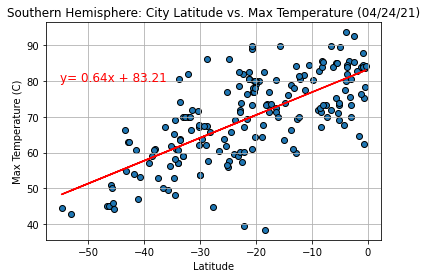

In [22]:
#linear regress
x_values = southern_hem['latitude']
y_values = southern_hem['max_temperature']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(southern_hem['latitude'], southern_hem['max_temperature'])
print(f'The r-value for Southern Hemisphere: City Latitude vs. Max Temperature is {res.rvalue}')

plt.scatter(southern_hem['latitude'], southern_hem['max_temperature'], edgecolors='black')
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.annotate(line_eq, (-55,80), fontsize=12, color='red')
plt.plot(southern_hem['latitude'], res.intercept + res.slope*southern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value for Northern Hemisphere: City Latitude vs. Humidity is 0.09021365933258585


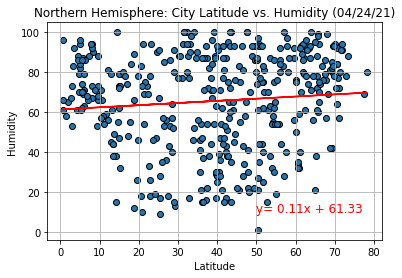

In [25]:
#linear regress
x_values = northern_hem['latitude']
y_values = northern_hem['humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(northern_hem['latitude'], northern_hem['humidity'])
print(f'The r-value for Northern Hemisphere: City Latitude vs. Humidity is {res.rvalue}')

plt.scatter(northern_hem['latitude'], northern_hem['humidity'], edgecolors='black')
plt.title('Northern Hemisphere: City Latitude vs. Humidity (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.annotate(line_eq, (50,10), fontsize=12, color='red')
plt.plot(northern_hem['latitude'], res.intercept + res.slope*northern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value for Southern Hemisphere: City Latitude vs. Humidity is 0.15005043983400154


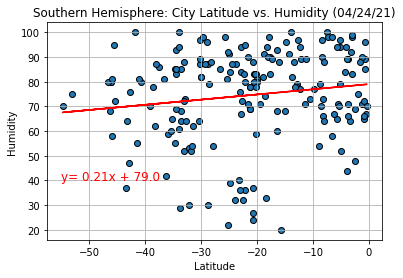

In [27]:
#linear regress
x_values = southern_hem['latitude']
y_values = southern_hem['humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(southern_hem['latitude'], southern_hem['humidity'])
print(f'The r-value for Southern Hemisphere: City Latitude vs. Humidity is {res.rvalue}')

plt.scatter(southern_hem['latitude'], southern_hem['humidity'], edgecolors='black')
plt.title('Southern Hemisphere: City Latitude vs. Humidity (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.annotate(line_eq, (-55,40), fontsize=12, color='red')
plt.plot(southern_hem['latitude'], res.intercept + res.slope*southern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value for Northern Hemisphere: City Latitude vs. Cloudiness is 0.18704588665021163


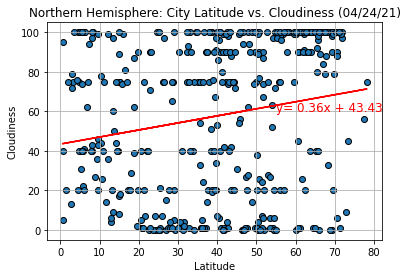

In [29]:
#linear regress
x_values = northern_hem['latitude']
y_values = northern_hem['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(northern_hem['latitude'], northern_hem['cloudiness'])
print(f'The r-value for Northern Hemisphere: City Latitude vs. Cloudiness is {res.rvalue}')

plt.scatter(northern_hem['latitude'], northern_hem['cloudiness'], edgecolors='black')
plt.title('Northern Hemisphere: City Latitude vs. Cloudiness (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.annotate(line_eq, (55,60), fontsize=12, color='red')
plt.plot(northern_hem['latitude'], res.intercept + res.slope*northern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value for Southern Hemisphere: City Latitude vs. Cloudiness is 0.23465233036068098


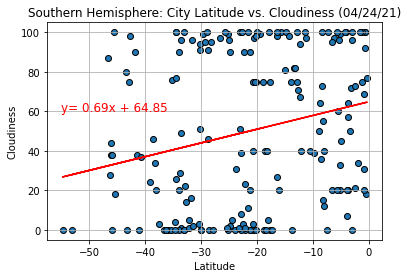

In [31]:
#linear regress
x_values = southern_hem['latitude']
y_values = southern_hem['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(southern_hem['latitude'], southern_hem['cloudiness'])
print(f'The r-value for Southern Hemisphere: City Latitude vs. Cloudiness is {res.rvalue}')

plt.scatter(southern_hem['latitude'], southern_hem['cloudiness'], edgecolors='black')
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.annotate(line_eq, (-55,60), fontsize=12, color='red')
plt.plot(southern_hem['latitude'], res.intercept + res.slope*southern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value for Northern Hemisphere: City Latitude vs. Wind Speed is 0.10332489325210849


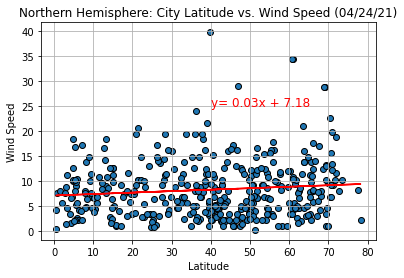

In [33]:
#linear regress
x_values = northern_hem['latitude']
y_values = northern_hem['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(northern_hem['latitude'], northern_hem['wind_speed'])
print(f'The r-value for Northern Hemisphere: City Latitude vs. Wind Speed is {res.rvalue}')

plt.scatter(northern_hem['latitude'], northern_hem['wind_speed'], edgecolors='black')
plt.title('Northern Hemisphere: City Latitude vs. Wind Speed (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.annotate(line_eq, (40,25), fontsize=12, color='red')
plt.plot(northern_hem['latitude'], res.intercept + res.slope*northern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value for Southern Hemisphere: City Latitude vs. Wind Speed is -0.1719493628799146


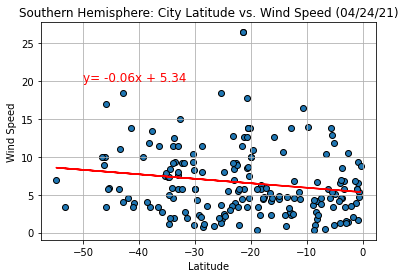

In [35]:
#linear regress
x_values = southern_hem['latitude']
y_values = southern_hem['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(southern_hem['latitude'], southern_hem['wind_speed'])
print(f'The r-value for Southern Hemisphere: City Latitude vs. Wind Speed is {res.rvalue}')

plt.scatter(southern_hem['latitude'], southern_hem['wind_speed'], edgecolors='black')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.annotate(line_eq, (-50,20), fontsize=12, color='red')
plt.plot(southern_hem['latitude'], res.intercept + res.slope*southern_hem['latitude'], 'r', label='fitted line')
plt.show()